# <center>Outpatient and Ambulatory Surgery Consumer Assessment of Healthcare Providers and Systems</center>

### <center>A Data Science Blog Project</center>

#### <center>By: Rachel Bieron </center>

*****************************************************************************************************************************************************

# Section 1: Business Understanding

Explore national complications and deaths data following medical events using data published by Centers for Medicare & Medicaid Services (CMS) with the questions listed below. 

### 1. In general, how do most outpatient and ambulatory surgery centers rate according to the survey?
### 2. What measures have the greatest impact on whether or not someone would recommend a facility?
### 3. What measures make a consumer most likely to recommend a facility?
### 4. What Measures make a consumer least likely to recommend a facility?


*****************************************************************************************************************************************************

### <center> Set Up Enviroment for Analysis </center>

In [66]:
# Setting up environment with imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

*****************************************************************************************************************************************************

# Section 2: Data Understanding

### <center> Gather Data </center>

#### Start by loading data from "ASCQR_OAS_CAHPS_BY_ASC.csv" 

In [67]:
# Import survey results to dataframe 'results_df'
results_df = pd.read_csv("ASCQR_OAS_CAHPS_BY_ASC.csv")

### <center> Assess Data </center>

#### Find out the size and shape, fields, and datatypes 

In [68]:
# Describe the shape of the dataframe
results_df.shape

(710, 30)

#### The data has 710 records and 30 fields. The fields are listed below.

In [69]:
# list the fields of the dataframe
print(list(results_df))

['Facility ID', 'Facility Name', 'Address', 'City/Town', 'State', 'ZIP Code', 'County/Parish', 'Telephone Number', 'Patients who reported that staff definitely gave care in a professional way and the facility was clean', 'Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean', 'Patients who reported that staff did not give care in a professional way or the facility was not clean', 'Facilities and staff linear mean score', 'Patients who reported that staff definitely communicated about what to expect during and after the procedure', 'Patients who reported that staff somewhat communicated about what to expect during and after the procedure', 'Patients who reported that staff did not communicate about what to expect during and after the procedure', 'Communication about your procedure linear mean score', 'Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)', 'Patients who gave the facility a ra

#### Get more information about the data like datatypes and see if there are any null values

In [70]:
# Find out more about the fields including data types
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 30 columns):
 #   Column                                                                                                        Non-Null Count  Dtype  
---  ------                                                                                                        --------------  -----  
 0   Facility ID                                                                                                   710 non-null    object 
 1   Facility Name                                                                                                 710 non-null    object 
 2   Address                                                                                                       710 non-null    object 
 3   City/Town                                                                                                     710 non-null    object 
 4   State                                                   

#### The above shows us that there null vlues in some fields since the number of non-null values is less than the number of records in some fields. We also won't need to use all of these fields for our analysis.

In [71]:
# Describe the data to look at the mean value
results_df.describe()

,ZIP Code,County/Parish,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Facilities and staff linear mean score,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Communication about your procedure linear mean score,...,Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients' rating of the facility linear mean score,Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends",Patients recommending the facility linear mean score,Footnote,Number of Sampled Patients,Number of Completed Surveys,Survey Response Rate Percent
count,710.000000,0.0,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,...,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,231.000000,499.000000,499.000000,499.000000
mean,52314.404225,NaN,97.278557,2.450902,0.270541,98.478958,91.911824,6.565130,1.523046,95.198397,...,1.853707,95.198397,86.983968,11.176353,1.839679,94.737475,3.870130,1244.681363,327.440882,27.675351
std,28072.573098,NaN,1.321950,1.056199,0.475245,0.836575,2.289368,1.850124,0.736982,1.462626,...,1.269285,1.532354,4.776505,4.124684,1.258844,2.009320,0.447718,778.433767,176.540728,7.713677
min,1089.000000,NaN,92.000000,0.000000,0.000000,95.000000,84.000000,2.000000,0.000000,90.000000,...,0.000000,90.000000,61.000000,3.000000,0.000000,85.000000,2.000000,153.000000,42.000000,6.000000
25%,30177.250000,NaN,97.000000,2.000000,0.000000,98.000000,90.000000,5.000000,1.000000,94.000000,...,1.000000,94.000000,84.000000,8.000000,1.000000,94.000000,4.000000,866.000000,235.000000,22.000000
50%,47784.500000,NaN,98.000000,2.000000,0.000000,99.000000,92.000000,6.000000,1.000000,95.000000,...,2.000000,95.000000,88.000000,11.000000,2.000000,95.000000,4.000000,1096.000000,290.000000,27.000000
75%,78117.000000,NaN,98.000000,3.000000,1.000000,99.000000,93.000000,8.000000,2.000000,96.000000,...,2.000000,96.000000,90.000000,14.000000,2.000000,96.000000,4.000000,1341.500000,357.000000,33.000000
max,99352.000000,NaN,100.000000,6.000000,3.000000,100.000000,98.000000,12.000000,5.000000,99.000000,...,9.000000,99.000000,97.000000,33.000000,8.000000,99.000000,4.000000,7918.000000,1457.000000,53.000000


#### By looking at the mean data, we can see that of the data gathered from 710 outpatient and ambulatory surgery centers across the United States, There was an average response rate of roughly 28%, or around 327 completed surveys per facility.

*****************************************************************************************************************************************************

# Section 3: Data Preparation

### <center> Clean Data </center>

#### We won't need the identifying information on the individual centers that data was collected from since we will be looking at the data as a whole. We also won't need the footnotes, start date, end date, or the linear mean scores to answer our questions, so we will drop these columns.

In [72]:
# Drop fields that we definitly won't consider in our analysis
results_df = results_df.drop(["Footnote","Start Date","End Date","Facility ID","Facility Name","Address","City/Town","State","ZIP Code",
                              "County/Parish","Telephone Number","Patients recommending the facility linear mean score", 
                              "Patients' rating of the facility linear mean score","Facilities and staff linear mean score",
                              "Communication about your procedure linear mean score","Number of Sampled Patients",
                              "Number of Completed Surveys", "Survey Response Rate Percent"], axis = 1)


#### Next we will handle null values

In [73]:
# Check for null values
results_df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          211
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    211
Patients who reported that staff did not give care in a professional way or the facility was not clean          211
Patients who reported that staff definitely communicated about what to expect during and after the procedure    211
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      211
Patients who reported that staff did not communicate about what to expect during and after the procedure        211
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   211
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    211
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (low

#### Each field has the same number of null values so it appears that 211 facilites were unable to fully report data. We can replace null values with mean data of all other facilities since data is per facility and we are looking at it nationally.

In [74]:
# Replace null values with mean data

# Get numeric columns
num_cols = results_df.select_dtypes(include=['float', 'int']).columns

# Replace nulls
results_df[num_cols] = results_df[num_cols].fillna(results_df[num_cols].mean())

In [75]:
# Verify null values are have been replaced
results_df.isna().sum()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          0
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0
Patients who reported that staff did not give care in a professional way or the facility was not clean          0
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      0
Patients who reported that staff did not communicate about what to expect during and after the procedure        0
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   0
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    0
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (high

In [76]:
# With null values replaced, re-examine the mean of the data
results_df.mean()

Patients who reported that staff definitely gave care in a professional way and the facility was clean          97.278557
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean     2.450902
Patients who reported that staff did not give care in a professional way or the facility was not clean           0.270541
Patients who reported that staff definitely communicated about what to expect during and after the procedure    91.911824
Patients who reported that staff somewhat communicated about what to expect during and after the procedure       6.565130
Patients who reported that staff did not communicate about what to expect during and after the procedure         1.523046
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   89.382766
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                     8.763527
Patients who gave the fa

In [77]:
# create a copy of the clean dataframe to be used in our analysis

# create a copy of the clean dataframe abrreviating the names for readability
results_df_sums = results_df.rename(columns={"Patients who reported that staff definitely gave care in a professional way and the facility was clean":"Definitely - professional care & clean facility",   
                                "Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean":"Somewhat - professional care & clean facility",
                                "Patients who reported that staff did not give care in a professional way or the facility was not clean":"Not - professional care & clean facility",
                                "Patients who reported that staff definitely communicated about what to expect during and after the procedure":"Definitely - communication about procedure",
                                "Patients who reported that staff somewhat communicated about what to expect during and after the procedure":"Somewhat - communication about procedure",
                                "Patients who reported that staff did not communicate about what to expect during and after the procedure":"Not - communication about procedure",
                                "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)":"Rating 9 or 10",
                                "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)":"Rating 7 or 8",
                                "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)":"Rating 0 to 6",
                                "Patients who reported YES they would DEFINITELY recommend the facility to family or friends":"DEFINITELY recommend",
                                "Patients who reported PROBABLY YES they would recommend the facility to family or friends":"PROBABLY recommend",
                                "Patients who reported NO, they would not recommend the facility to family or friends":"NOT recommend",
                               }
                      )

#### Check if the data is standardized to ensure efficiency when modeling. 

In [78]:
# Confirm data is not yet standardized
results_df.std()


Patients who reported that staff definitely gave care in a professional way and the facility was clean          1.107915
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0.885192
Patients who reported that staff did not give care in a professional way or the facility was not clean          0.398298
Patients who reported that staff definitely communicated about what to expect during and after the procedure    1.918700
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      1.550574
Patients who reported that staff did not communicate about what to expect during and after the procedure        0.617659
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   3.370806
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    2.701955
Patients who gave the facility a

#### We can see that our data will need to be standardized. We will do this using scikit-learn StandardScaler.

In [79]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [80]:
# Make a copy of the dataframe to standarize
#std_results_df = results_df

# Select features to standardize -we will standardize all features
features_to_standardize = results_df.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
results_df[features_to_standardize] = scaler.fit_transform(results_df[features_to_standardize])

In [81]:
# Describe standarized data
results_df.describe()

,Patients who reported that staff definitely gave care in a professional way and the facility was clean,Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean,Patients who reported that staff did not give care in a professional way or the facility was not clean,Patients who reported that staff definitely communicated about what to expect during and after the procedure,Patients who reported that staff somewhat communicated about what to expect during and after the procedure,Patients who reported that staff did not communicate about what to expect during and after the procedure,Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest),Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest),Patients who reported YES they would DEFINITELY recommend the facility to family or friends,Patients who reported PROBABLY YES they would recommend the facility to family or friends,"Patients who reported NO, they would not recommend the facility to family or friends"
count,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02,7.100000e+02
mean,-3.497672e-15,-7.505733e-17,4.003058e-17,2.461880e-15,7.005351e-17,-3.002293e-16,5.163944e-15,6.655083e-16,1.000764e-17,-4.803669e-16,-3.902981e-16,1.401070e-16
std,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00,1.000705e+00
min,-4.767764e+00,-2.770733e+00,-6.797209e-01,-4.126440e+00,-2.946232e+00,-2.467577e+00,-4.566745e+00,-2.875326e+00,-1.743799e+00,-6.495457e+00,-2.366920e+00,-1.744957e+00
25%,-2.516018e-01,-5.097423e-01,-6.797209e-01,-4.755649e-01,-3.647222e-01,-8.474178e-01,-1.136332e-01,-6.531458e-01,-8.030900e-01,-2.459717e-01,-6.300183e-01,-7.964457e-01
50%,0.000000e+00,0.000000e+00,-6.797209e-01,0.000000e+00,0.000000e+00,-3.597475e-16,4.218835e-15,6.578975e-16,0.000000e+00,0.000000e+00,-5.142261e-16,2.106119e-16
75%,6.516306e-01,6.207529e-01,0.000000e+00,5.675423e-01,2.806551e-01,7.727411e-01,4.801151e-01,4.579443e-01,1.376187e-01,5.039665e-01,2.384323e-01,1.520660e-01
max,2.458096e+00,4.012239e+00,6.857629e+00,3.175310e+00,3.507542e+00,5.633218e+00,2.855108e+00,4.902304e+00,6.722580e+00,2.503802e+00,6.317587e+00,5.843136e+00


#### Our data is ready for modeling

*****************************************************************************************************************************************************

## <center> Functions we will use for our analysis </center>

In [82]:
# This function creates a correlation matrix

def create_corr_matrix(df):
    """
    returns: a correlation matrix of the input dataframe
       
    input:
         df: a dataframe 

    output:
         corr_matrix, a correlation matrix of the input dataframe
    """
    corr_matrix = df.corr()
    return corr_matrix 

In [83]:
# This function creates a heatmap of the correlation matrix using seaborn 

def create_heatmap(corr_df,map_title):
    """
    returns: None
       
    input:
         corr_df: a dataframe of correlated data
         map_title: a string of the title for the heatmap

    output:
         a titled heatmap of a correlated dataframe
    """
    plt.figure(figsize=(20, 16))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm')
    plt.title(map_title)
    plt.show()

In [84]:
# This function creates a scattermatrix

def create_scatter_matrix(corr_df):
    """
    returns: None
       
    input:
         corr_df: a dataframe of crrelated data

    output:
         a scatter matrix plot of a correlated dataframe
    """
    scatter_matrix_plot = scatter_matrix(corr_df, figsize=(18, 16))

    # Adjust how axis labels are displayed
    for ax in scatter_matrix_plot.ravel():
        if ax.get_xlabel():
            ax.set_xlabel(ax.get_xlabel(), rotation=0, ha='center', wrap=True)
        if ax.get_ylabel():
            ax.set_ylabel(ax.get_ylabel(), rotation=90, va='center', wrap=True)
        
    plt.tight_layout()
    plt.show()

*****************************************************************************************************************************************************

# Section 4: Modeling

### Before creating our models we will examine the distribution of features and their correlation

#### We will look at histograms of the standardized data to see the distributions of features

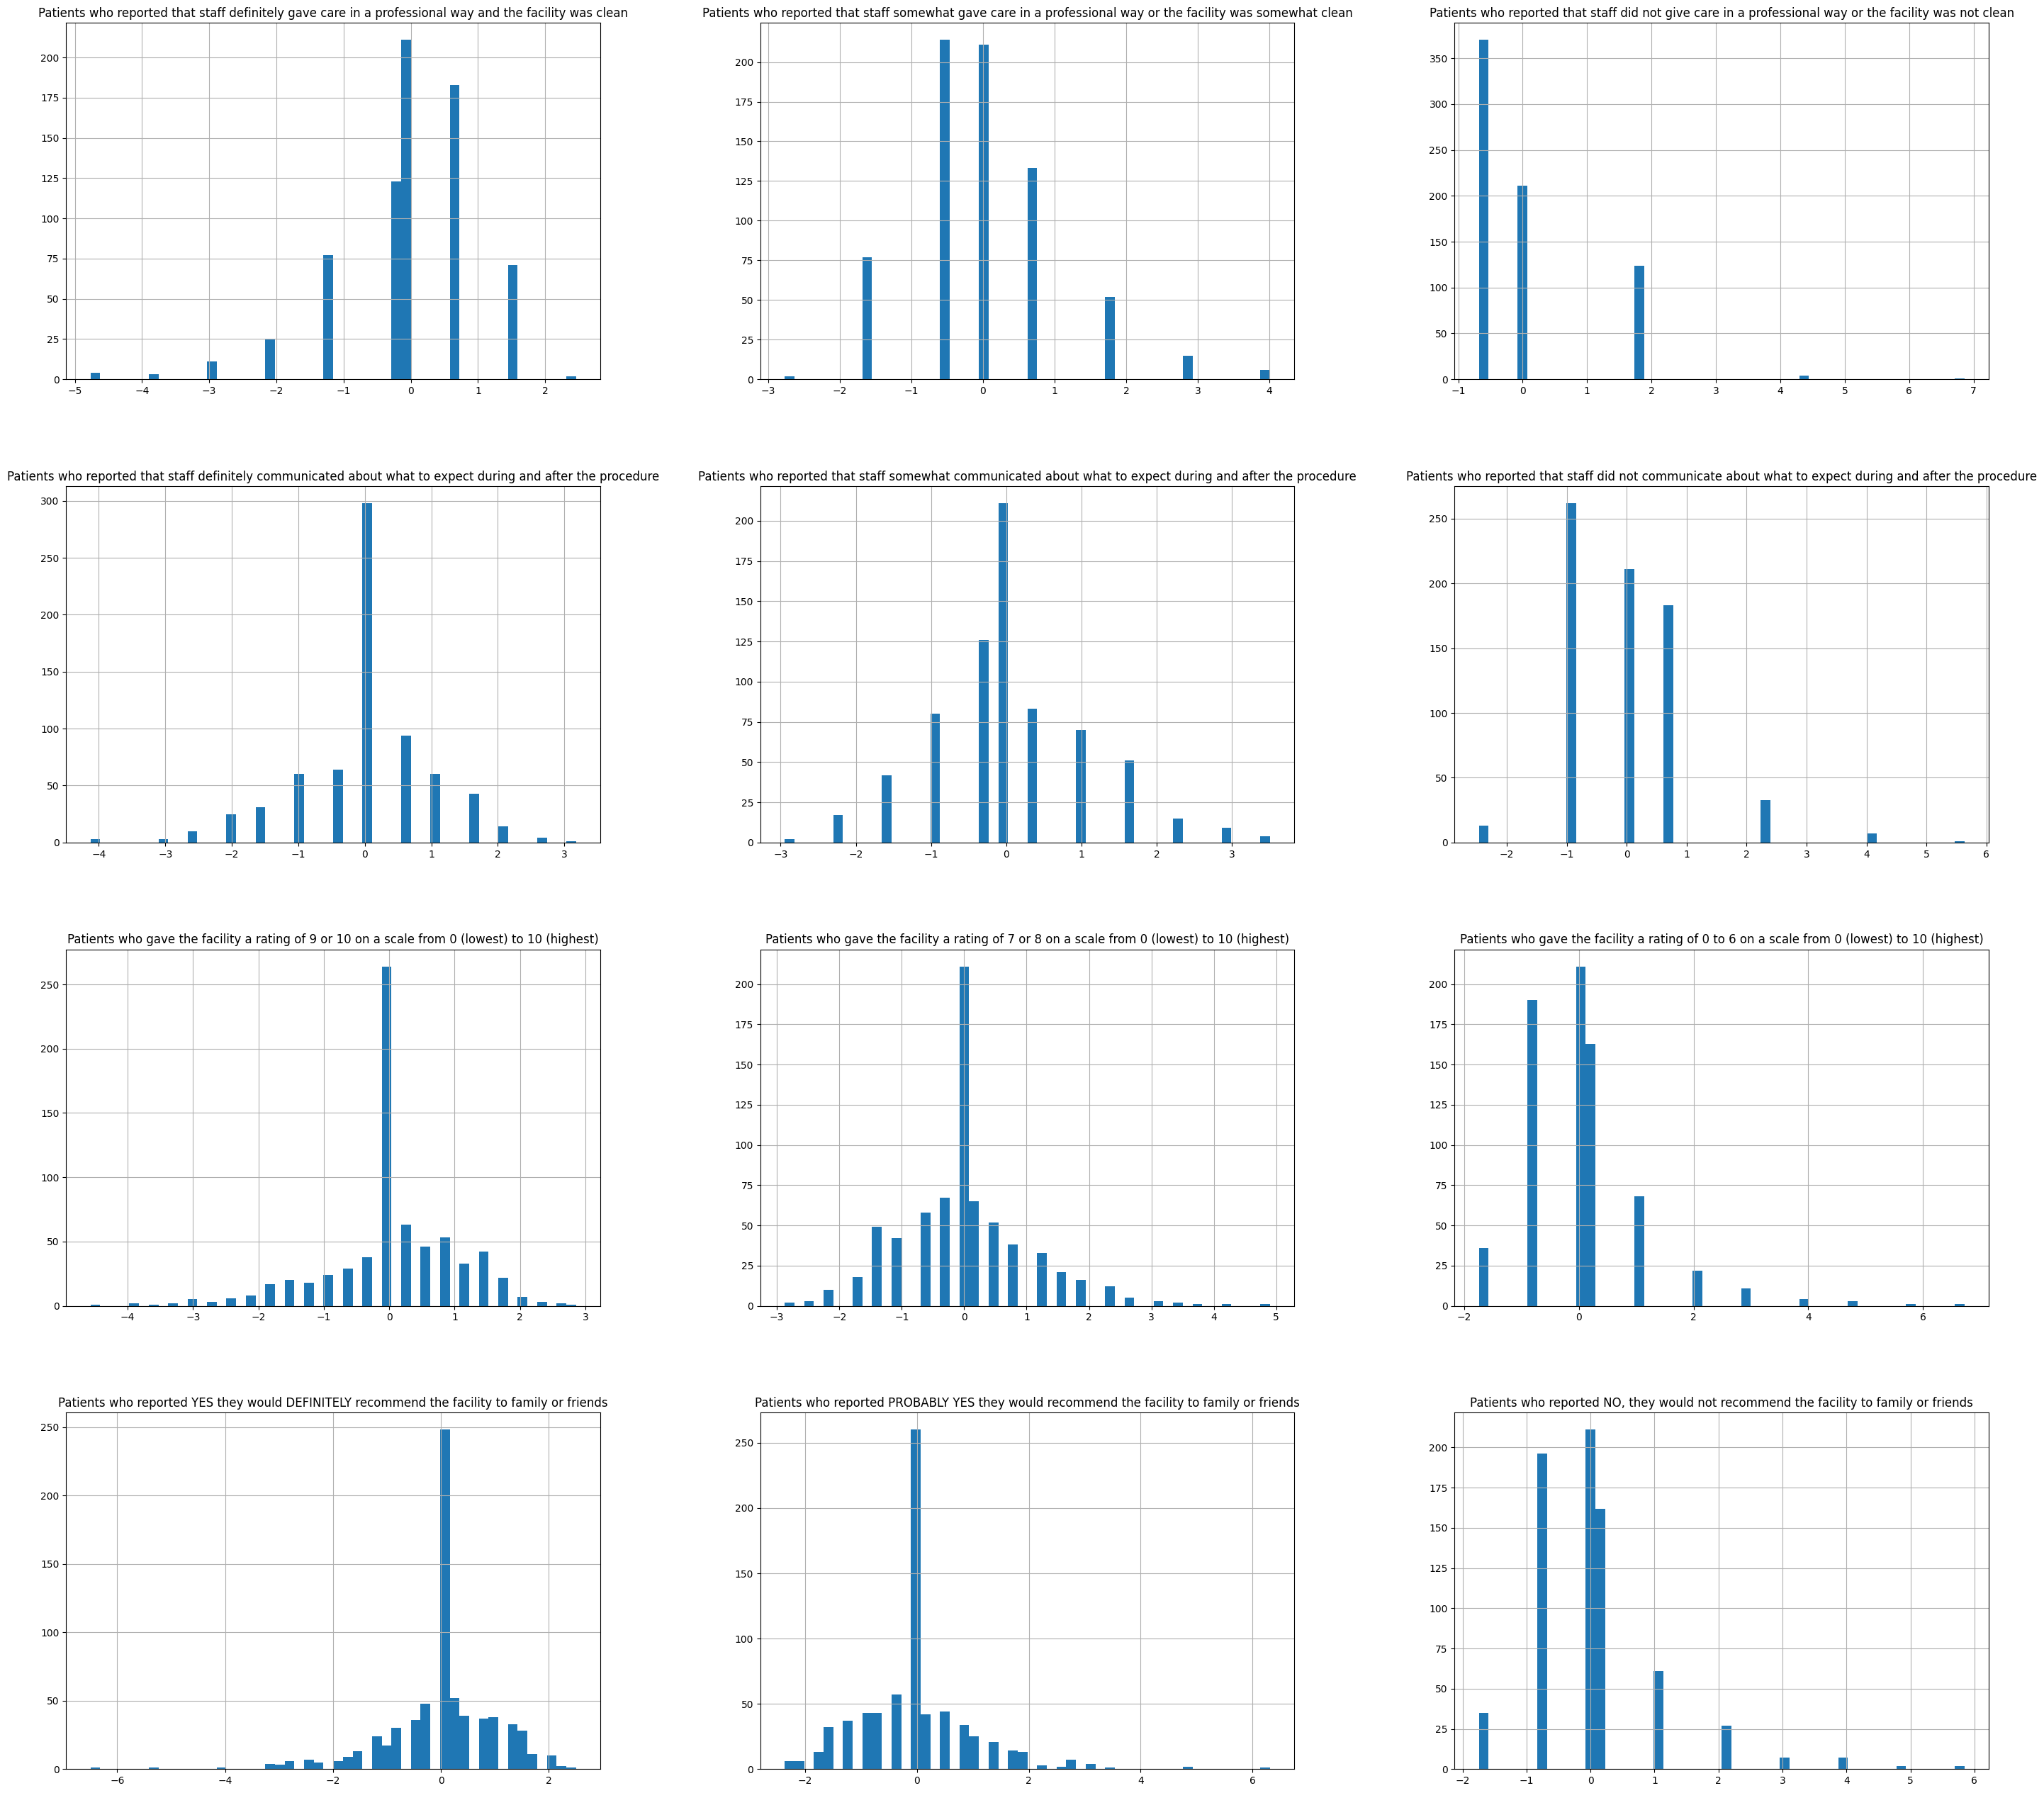

In [85]:
# Plot histograms of the features with matplotlib to see their distributions

results_df.hist(bins=50, figsize=(35, 32))
plt.show()

#### The histograms show us the distributions of the standarized results. We can also begin to see the relationships between the results. The graphs on the left favor the right, the middle column of graphs is fairly centralized, and the 3 graphs on the right favor the left.

#### Next, we will examine the correlations of all features by creating a correlation matrix and a heatmap 

In [86]:
# Calculate the correlation matrix of all features
corr_matrix = create_corr_matrix(results_df)

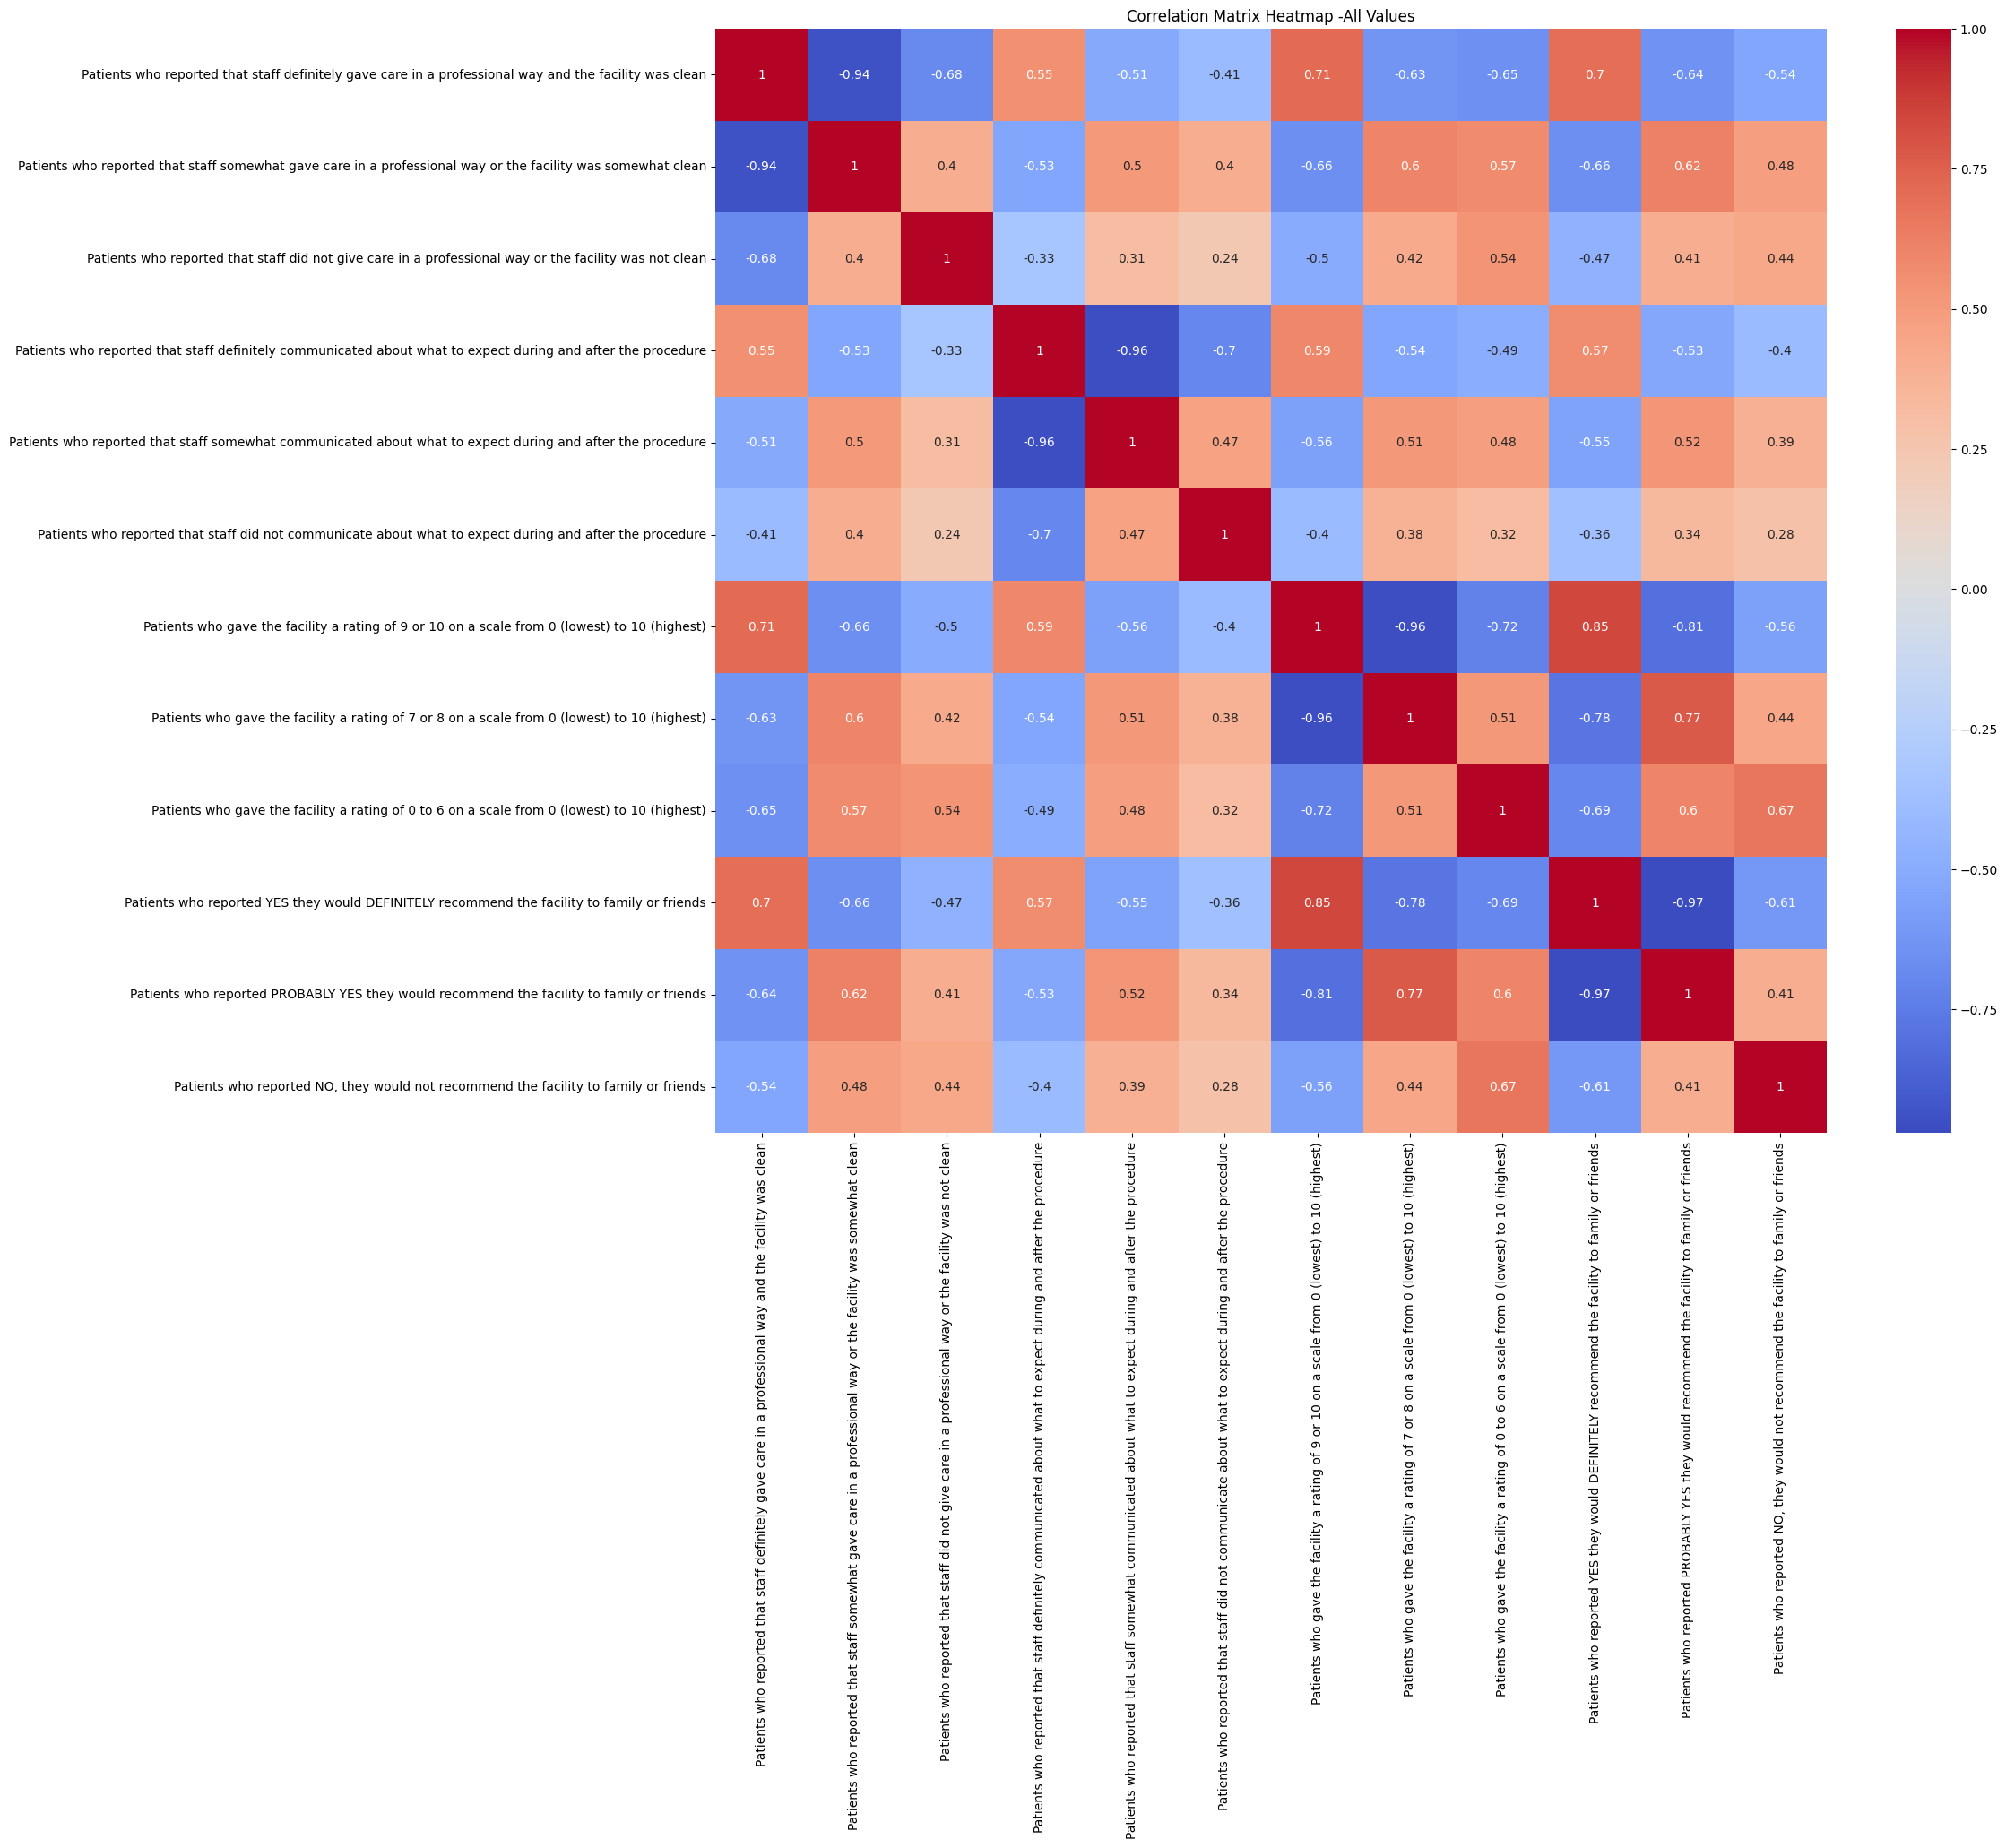

In [87]:
# Plot a heatmap of the correlation matrix 
create_heatmap(corr_matrix,'Correlation Matrix Heatmap -All Values')


#### The heatmap above visualizes the correlation between features of the survey results.

## Train and Evaluate a Model for definitely recommending a facility

In [88]:
# Split the data into features and labels

X = results_df.drop("Patients who reported YES they would DEFINITELY recommend the facility to family or friends", axis=1)
y = results_df["Patients who reported YES they would DEFINITELY recommend the facility to family or friends"]


In [89]:
# Split data with ratio: train: 0.8 | test: 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [90]:
# Create a linear regression object to train and score

linear_model = LinearRegression()

In [91]:
# Train a linear regression model on the training set

linear_model.fit(X_train, y_train)

LinearRegression()

In [92]:
# Make predictions on the training set
linear_predictions_train = linear_model.predict(X_train)

# Make predictions on the test set
linear_predictions_test = linear_model.predict(X_test)

print(linear_predictions_test[:12].round(0))

[-1. -1. -0.  1. -0. -1.  0. -0. -0.  0.  1.  1.]


In [93]:
# Compare the predictions with the actual values
print(y_test[:12].values.round(0))

[-1. -1.  0.  1.  0. -1.  0.  0.  0.  0.  1.  1.]


#### It looks like the model works well since the training and testing values appear to line up.

In [94]:
# Calculate the relative error of these predictions

relative_errors = np.abs(linear_predictions_test - y_test) / y_test * 100
print("Relative errors in percent: ", relative_errors[:12].values)

Relative errors in percent:  [-2.82790910e-13 -4.34765195e-13             inf  2.21176418e-13
             inf -1.11478255e-14  2.65985810e-11             inf
             inf  1.47817989e-11  8.85412589e-14  3.52475183e-13]


#### We have very small to almost zero relative errors. The model still looks good.

In [95]:
# Calculate the root mean squared error on the training and test set

# Training RMSE
rmse_train = root_mean_squared_error(y_train, linear_predictions_train)
print(f"Training RMSE: {rmse_train}")

# Testing RMSE
rmse_test = root_mean_squared_error(y_test, linear_predictions_test)
print(f"Testing RMSE: {rmse_test}")

Training RMSE: 1.3918024139118362e-15
Testing RMSE: 1.2422026573959613e-15


#### The difference between the training and testing root mean squared error (RMSE) is very small. The smaller testing RMSE suggests almost no underfitting. The values are very close to zero suggesting a good fit, it looks like this model performs well. We will train a more simple model of only one feature for comparison.

In [96]:
# Train a simple linear regression model with only one feature for comparison

# Train
X_train_high_rating = X_train[['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)']]

# Test 
X_test_high_rating = X_test[['Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)']]

In [97]:
# Create a linear regression object to train and score

simple_linear_model = LinearRegression()

In [98]:
# Fit simple model
simple_linear_model.fit(X_train_high_rating, y_train)

LinearRegression()

In [99]:
# Make predictions on the training and test sets

# Make predictions on the training set
simple_predictions_train = simple_linear_model.predict(X_train_high_rating)

# Make predictions on the test set
simple_predictions_test = simple_linear_model.predict(X_test_high_rating)

In [100]:
# Calculate the root mean squared error on the training and test set

# Training Simple RMSE
simple_rmse_train = root_mean_squared_error(y_train, simple_predictions_train)
print(f"Training Simple RMSE: {simple_rmse_train}")

# Testing Simple RMSE
simple_rmse_test = root_mean_squared_error(y_test, simple_predictions_test)
print(f"Testing Simple RMSE: {simple_rmse_test}")

Training Simple RMSE: 0.5593673511849193
Testing Simple RMSE: 0.41879342936372277


#### If we look at a simpler model based only the rating, we see the difference between the RMSEs is less and the smaller testing RMSE still suggests almost no underfitting, but the larger RMSEs tell us that the simple model does not out-perform the original model.

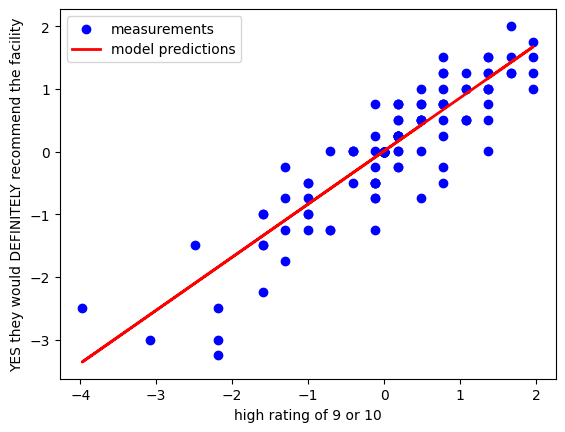

In [101]:
# Plot the simple linear regression model

plt.scatter(X_test_high_rating, y_test, color='blue', label='measurements')
plt.plot(X_test_high_rating, simple_predictions_test, color='red', linewidth=2, label='model predictions')
plt.xlabel("high rating of 9 or 10")
plt.ylabel("YES they would DEFINITELY recommend the facility")
plt.legend(loc="upper left")
plt.show()

#### The graph shows us that the simple model is still a decent performing model. However, it is not as robust as the original linear model.

## Train and Evaluate a Model for not recommending a facility

In [102]:
# Split the data into features and labels

X2 = results_df.drop("Patients who reported NO, they would not recommend the facility to family or friends", axis=1)
y2 = results_df["Patients who reported NO, they would not recommend the facility to family or friends"]


In [103]:
# Split data with ratio: train: 0.8 | test: 0.2

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=13)

In [104]:
# Create a linear regression object to train and score

linear_model2 = LinearRegression()

In [105]:
# Train a linear regression model on the training set

linear_model2.fit(X2_train, y2_train)

LinearRegression()

In [106]:
# Make predictions on the training set
linear_predictions_train2 = linear_model2.predict(X2_train)

# Make predictions on the test set
linear_predictions_test2 = linear_model2.predict(X2_test)

print(linear_predictions_test2[:12].round(0))

[ 0.  0. -0. -1. -0.  0.  0. -0. -0. -1. -1.  0.]


In [107]:
# Compare the predictions with the actual values
print(y2_test[:12].values.round(0))

[ 0.  0.  0. -1.  0.  0.  0.  0.  0. -1. -1.  0.]


#### Again, it looks like this model also works well since the  training and testing values appear to line up.

In [108]:
# Calculate the relative error of these predictions

relative_errors2 = np.abs(linear_predictions_test2 - y2_test) / y2_test * 100
print("Relative errors in percent: ", relative_errors2[:12].values)

Relative errors in percent:  [ 1.11339159e-12  9.30868382e-13  6.59036999e+02 -2.78794405e-14
  6.59036999e+02  1.22290552e-12  8.76111418e-13  6.59036999e+02
  6.59036999e+02 -1.67276643e-13 -8.36383215e-14  9.67373024e-13]


#### Different from the first model, while we see very small relative errors, we don't see any almost zero numbers.

In [109]:
# Calculate the root mean squared error on the training and test set

# Training RMSE
rmse_train2 = root_mean_squared_error(y2_train, linear_predictions_train2)
print(f"Training RMSE: {rmse_train2}")

# Testing RMSE
rmse_test2 = root_mean_squared_error(y2_test, linear_predictions_test2)
print(f"Testing RMSE: {rmse_test2}")


Training RMSE: 1.7718841695292409e-15
Testing RMSE: 1.6377731123645516e-15


#### The difference between the training and testing root mean squared error (RMSE) is very small as in the first model. Again, the smaller testing RMSE suggests almost no underfitting. Again, the values are very close to zero suggesting a good fit, it looks like this model performs well. 

In [110]:
# Train a simple linear regression model with only one feature for comparison

# Train 
X_train_low_rating = X2_train[['Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)']]

# Test
X_test_low_rating = X2_test[['Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)']]

In [111]:
# Create a linear regression object to train and score

simple_linear_model2 = LinearRegression()

In [112]:
# Fit simple model

simple_linear_model2.fit(X_train_low_rating, y2_train)

LinearRegression()

In [113]:
# Make predictions on the training and test set

# Make predictions on the training set
simple_predictions_train2 = simple_linear_model2.predict(X_train_low_rating)

# Make predictions on the test set
simple_predictions_test2 = simple_linear_model2.predict(X_test_low_rating)

In [114]:
# Calculate the root mean squared error on the training and test set

# Training Simple RMSE
simple_rmse_train2 = root_mean_squared_error(y2_train, simple_predictions_train2)
print(f"Training Simple RMSE: {simple_rmse_train2}")

# Testing Simple RMSE
simple_rmse_test2 = root_mean_squared_error(y2_test, simple_predictions_test2)
print(f"Testing Simple RMSE: {simple_rmse_test2}")

Training Simple RMSE: 0.7451795197730151
Testing Simple RMSE: 0.7376328294061654


#### Again, if we look at a simpler model based only the rating, again we see the difference between the RMSEs is less and the smaller testing RMSE still suggests almost no underfitting, but the larger RMSEs tell us that the simple model does not out-perform the original model.

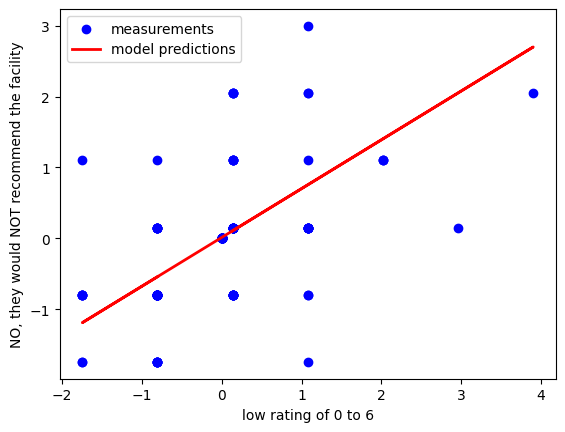

In [115]:
# Plot the simple linear regression model
plt.scatter(X_test_low_rating, y2_test, color='blue', label='measurements')
plt.plot(X_test_low_rating, simple_predictions_test2, color='red', linewidth=2, label='model predictions')
plt.xlabel("low rating of 0 to 6")
plt.ylabel("NO, they would NOT recommend the facility")
plt.legend(loc="upper left")
plt.show()

#### The graph for this simple model does not look like it performs quite as well as the simple model for definitely recommending a facility. However, we could still use these models to predict if a facility would not be recommended.

*****************************************************************************************************************************************************

# Section 5: Evaluation

# 1. In general, how do most outpatient and ambulatory surgery centers rate according to the survey?

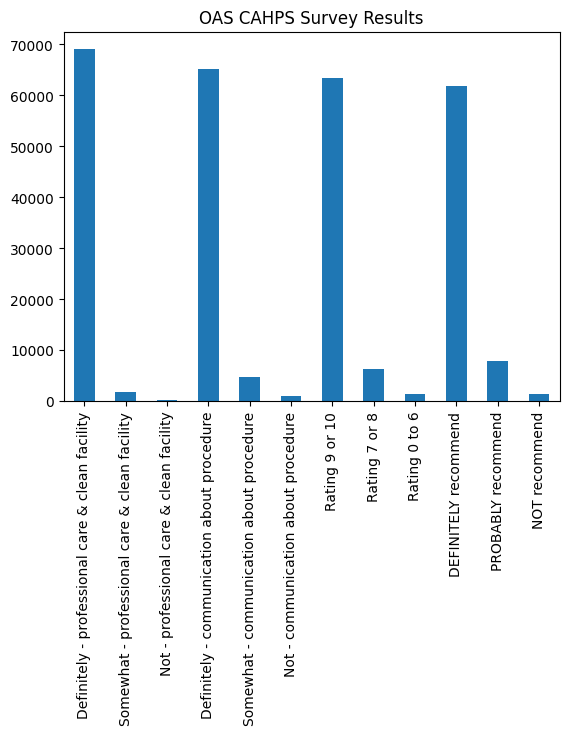

In [116]:
# Display bar graph of survey responses using our copy of the clean dataframe

# Sum up columns
results_df_sums = results_df_sums.sum()

results_df_sums.plot.bar(title= "OAS CAHPS Survey Results")
plt.show()

#### We can see the results are favorable and outpatient facilities and ambulatory surgery centers are highly rated throughout the country. A large majority of patients gave a rating of 9 or 10 out of a scale of 0–10 (10 being the highest and 0 being the lowest), definitely clean facility and professional care, definitely sufficient communication about their procedure expectations, and they would definitely recommend the facility. 

# 2. What measures have the greatest impact on whether or not someone would recommend a facility?

#### We can answer this question by looking at the correlation matrix of how a facility was rated and whether or not a patient would recommend the facility to family and friends.

In [124]:
# Create a new dataframe of only ratings and recommendations and abbreviate column names
df_rate_results = results_df[["Patients who reported NO, they would not recommend the facility to family or friends",
                              "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)" ,
                              "Patients who reported PROBABLY YES they would recommend the facility to family or friends",
                              "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)",
                              "Patients who reported YES they would DEFINITELY recommend the facility to family or friends",
                              "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)"
                             ]].rename(columns={"Patients who reported NO, they would not recommend the facility to family or friends":"NOT recommend",
                                                "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)":"Rating of 0 to 6" ,
                                                "Patients who reported PROBABLY YES they would recommend the facility to family or friends":"PROBABLY recommend",
                                                "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)":"Rating of 7 or 8" ,
                                                "Patients who reported YES they would DEFINITELY recommend the facility to family or friends":"DEFINITELY recommend",
                                                "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)":"Rating of 9 or 10" 
                                               }
                                      )

In [125]:
# Calculate the correlation matrix of just ratings and recommendations 
corr_matrix_rates = create_corr_matrix(df_rate_results)

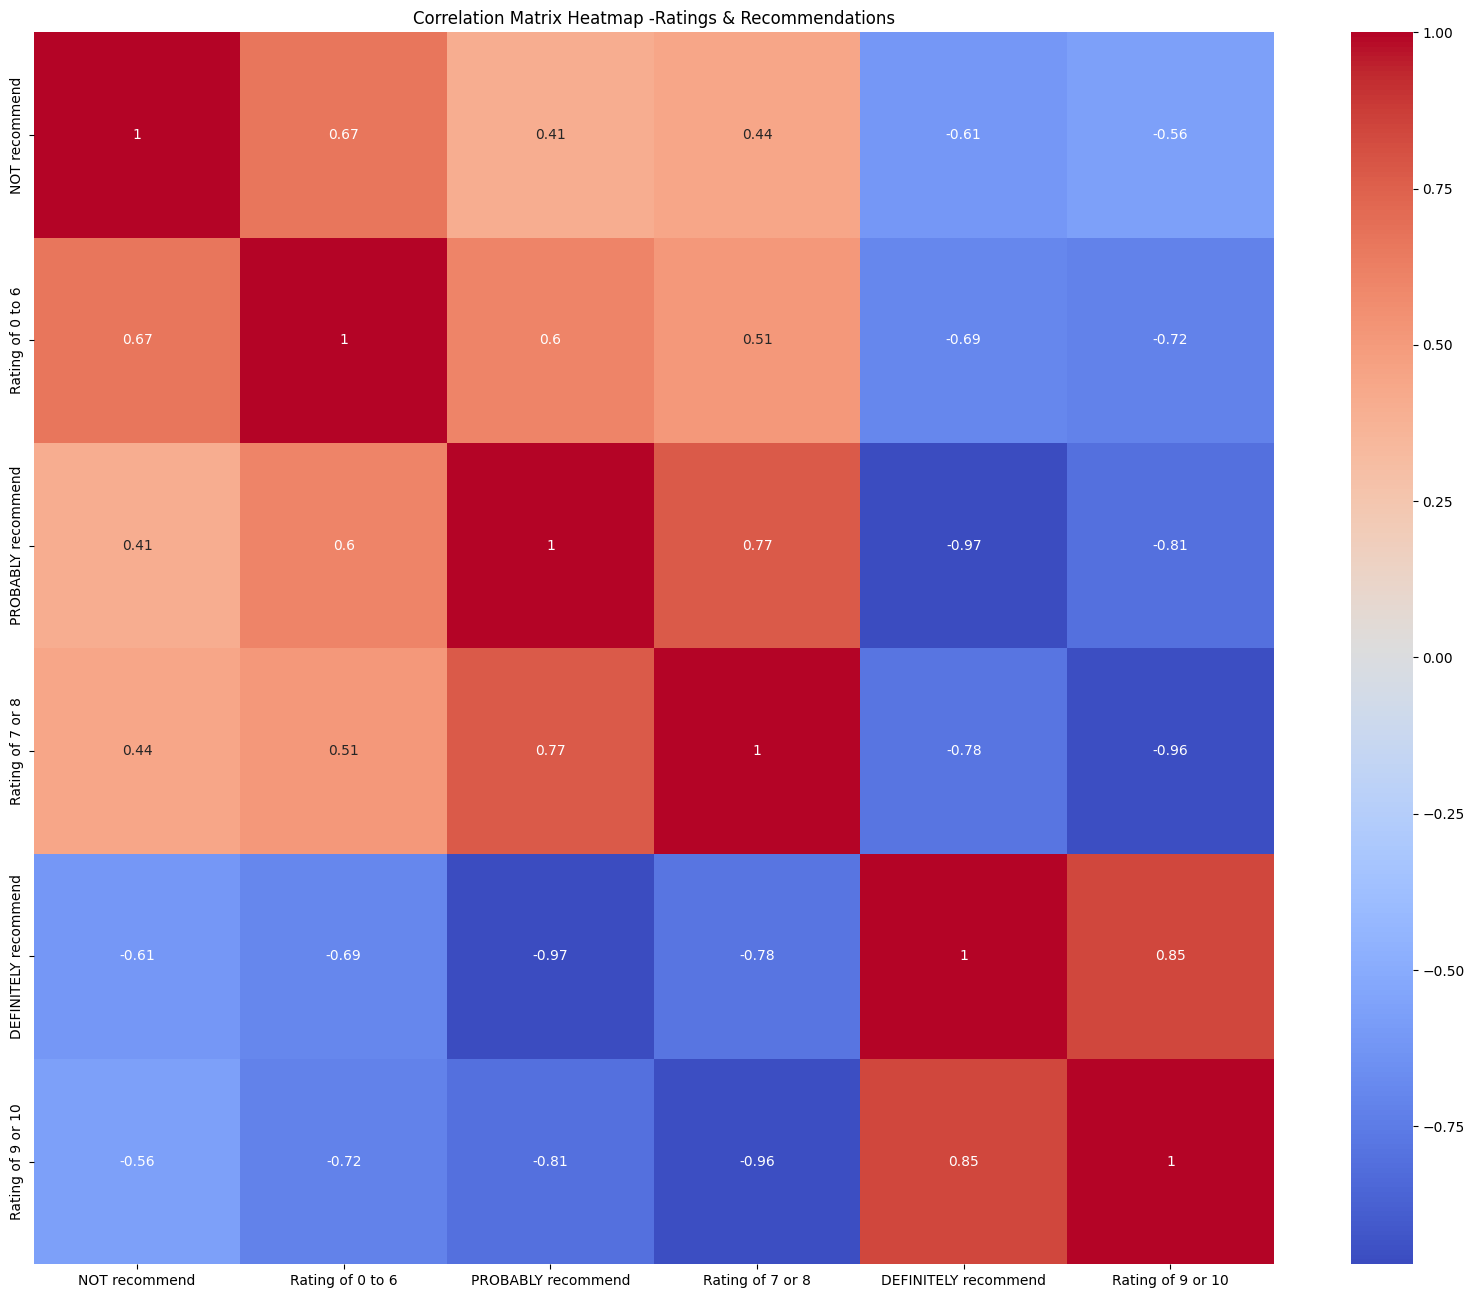

In [126]:
# Create a heatmap showing the correlations of ratings and recommendations 
create_heatmap(corr_matrix_rates,'Correlation Matrix Heatmap -Ratings & Recommendations')

#### By looking at the heatmap above, we can see that overall ratings, between 0 and 10, had the greatest impact on whether patients would recommend a facility to someone else. Patient ratings of 9 or 10 strongly correlated with definitely recommending a facility to others. Patient Ratings of 0 through 6 are associated with not recommending a facility to family members or friends and patient ratings of 7 or 8 were not only associated with patients maybe recommending a facility, but also strongly linked with patients not recommending a facility.

# 3. What measures make a consumer most likely to recommend a facility?

#### Find the correlation metrics to determine the most important features when recommending a facility

In [127]:
# Find the correlation metrics to determine the most important features when recommending a facility
corr_matrix['Patients who reported YES they would DEFINITELY recommend the facility to family or friends'].sort_values(ascending=False)

Patients who reported YES they would DEFINITELY recommend the facility to family or friends                     1.000000
Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)                   0.845401
Patients who reported that staff definitely gave care in a professional way and the facility was clean          0.695568
Patients who reported that staff definitely communicated about what to expect during and after the procedure    0.565269
Patients who reported that staff did not communicate about what to expect during and after the procedure       -0.364401
Patients who reported that staff did not give care in a professional way or the facility was not clean         -0.465150
Patients who reported that staff somewhat communicated about what to expect during and after the procedure     -0.554315
Patients who reported NO, they would not recommend the facility to family or friends                           -0.614238
Patients who reported that staff

In [128]:
# List the most important features
features = ["Patients who reported YES they would DEFINITELY recommend the facility to family or friends", 
            "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)",
            "Patients who reported that staff definitely gave care in a professional way and the facility was clean",
            "Patients who reported that staff definitely communicated about what to expect during and after the procedure"
           ]

In [129]:
# Create a dataframe and abbreviate feature names for readability
df_matrix_features = results_df[features].rename(columns={"Patients who reported YES they would DEFINITELY recommend the facility to family or friends":"would DEFINITELY recommend the facility",
                                                  "Patients who gave the facility a rating of 9 or 10 on a scale from 0 (lowest) to 10 (highest)":"gave the facility a rating of 9 or 10 (highest)",
                                                  "Patients who reported that staff definitely gave care in a professional way and the facility was clean":"reported professional care and clean facility",
                                                  "Patients who reported that staff definitely communicated about what to expect during and after the procedure":"reported communication about during and after the procedure" 
                                                 }
                                        )

#### Plot the most important feature pairs with a scatter matrix to show the relationships between the most important features for definitely recommending a facility.

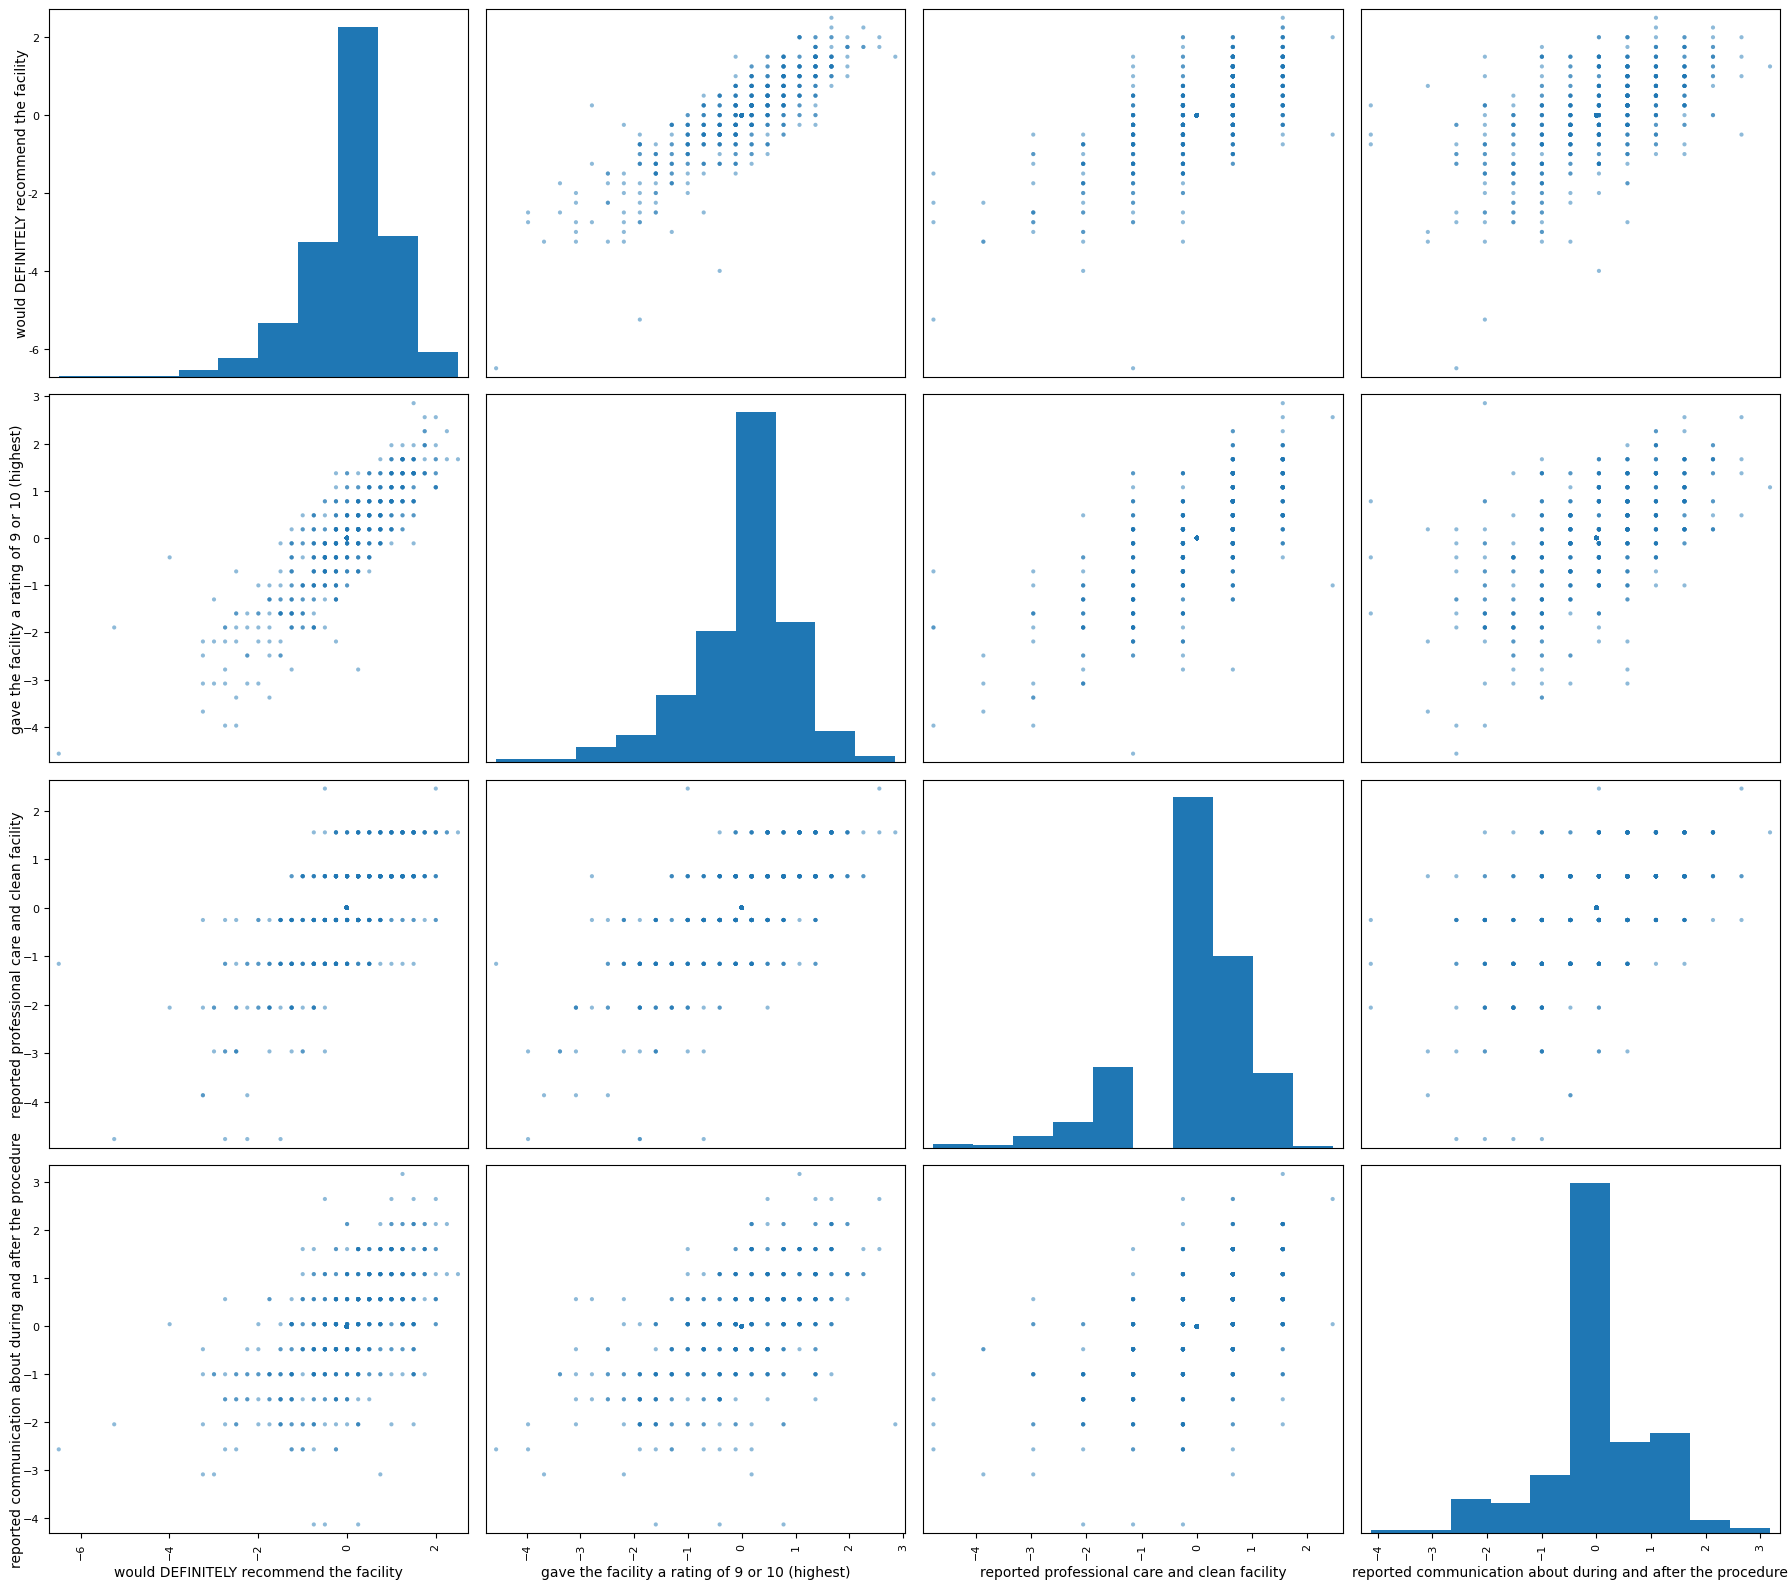

In [130]:
# Plot the most important feature pairs with a scatter plot
create_scatter_matrix(df_matrix_features)

#### The measures that were most strongly linked to a patient definitely recommending a facility were overall rating of 9 or 10 out of a scale of 0 to 10, with 10 being the highest rating and 0 the lowest, staff members acting professionally when giving care along with clean facilities, and  communication about expectations for during and after a procedure. The scatter plots show how these features relate, the tighter the dots, the stronger the impact. If a facility has a rating of 9 or 10 and is recommended to you, you could assume a professional staff, clean facility, and informed communication about your procedure.

# 4. What Measures make a consumer least likely to recommend a facility?

#### Find the correlation metrics to determine the most important features when not recommending a facility

In [131]:
# Find the correlation metrics to determine the most important features when not recommending a facility
corr_matrix['Patients who reported NO, they would not recommend the facility to family or friends'].sort_values(ascending=False)

Patients who reported NO, they would not recommend the facility to family or friends                            1.000000
Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)                    0.668949
Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean    0.477353
Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)                    0.439406
Patients who reported that staff did not give care in a professional way or the facility was not clean          0.435143
Patients who reported PROBABLY YES they would recommend the facility to family or friends                       0.406109
Patients who reported that staff somewhat communicated about what to expect during and after the procedure      0.389025
Patients who reported that staff did not communicate about what to expect during and after the procedure        0.278872
Patients who reported that staff

In [132]:
# List the most important features
features2 = ["Patients who reported NO, they would not recommend the facility to family or friends", 
             "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)",
             "Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean",
             "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)",
            ]

In [133]:
# Create a dataframe and abbreviate feature names for readability
df_matrix_features2 = results_df[features2].rename(columns={"Patients who reported NO, they would not recommend the facility to family or friends":"NO, would not recommend the facility", 
                                                            "Patients who gave the facility a rating of 0 to 6 on a scale from 0 (lowest) to 10 (highest)":"Rated facility 0 to 6 out of 10(highest)",
                                                            "Patients who reported that staff somewhat gave care in a professional way or the facility was somewhat clean":"somewhat professional care & somewhat clean facility",
                                                            "Patients who gave the facility a rating of 7 or 8 on a scale from 0 (lowest) to 10 (highest)":"Rated facility a 7 or 8 out of 10(highest)",
                                                           }
                                                   )

#### Plot the most important feature pairs with a scatter matrix to show the relationships between the most important features for not recommending a facility.

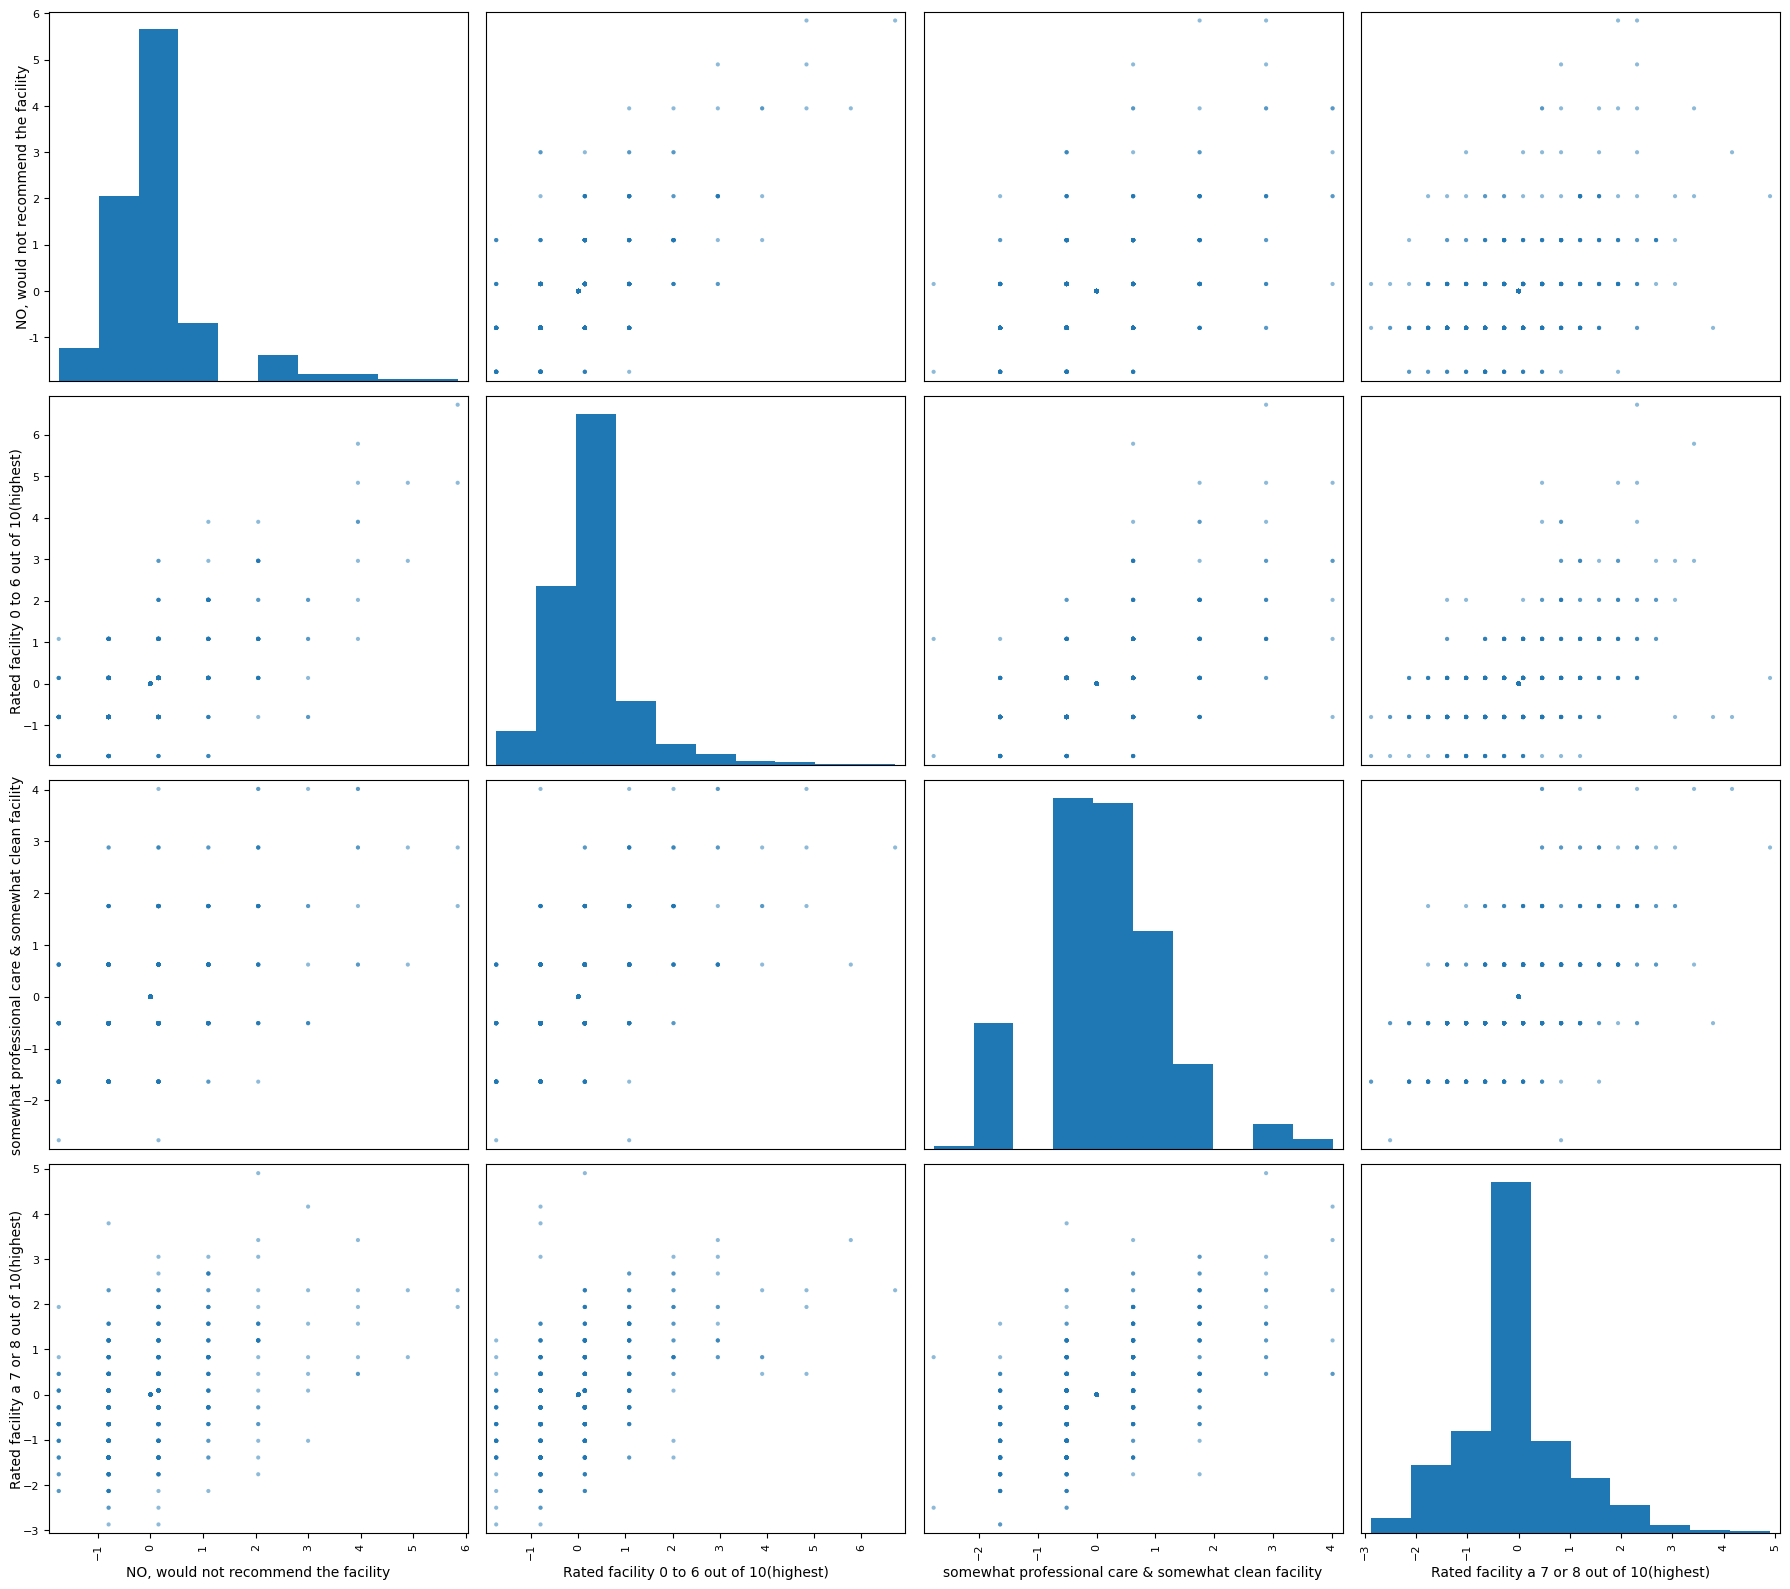

In [134]:
# Plot the most important feature pairs with a scatter plot
create_scatter_matrix(df_matrix_features2)

#### The measures that were most strongly linked to a patient not recommending a facility were overall rating of 0 through 6, the lack of professionalism of staff and facility cleanliness, closely followed by those who gave an overall rating of 7 or 8. The scatter matrix plot shows the relationships of the 3 highest linked categories to not recommending a facility. While can still see the dots forming a diagonal pattern, they are more spread out and not as defined as the relationships when recommending a facility.
